### DATA GATHERING SECTION

In [222]:
#import neccessary package needed for the analysis
import pandas as pd
import re
from IPython.display import Image
import numpy as np
import requests
import io
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython.display import Image
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [223]:
pip install tweepy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### LOAD DATA INTO THE PANDAS DATA FRAME

In [224]:
#WeRateDogs tweets archived data
df = pd.read_csv('twitter_archive.csv')

In [225]:
pip install requests

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [226]:
import requests
import os

In [227]:
#Image predictation data on the same WeRateDog tweets
req = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
image_prediction_df =  pd.read_csv(io.StringIO( req.text),sep='\t')

### Get retweet_count and favorite_count data from Twitter API

In [256]:
archive_data = pd.read_csv('Twitter_archive.csv')


In [263]:
#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = archive_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.NotFound as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        except tweepy.errors.BadRequest as e:
            print("bad request")
            break;
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


TweepyException: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=892420643555336193&tweet_mode=extended (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001A17BC1DF10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [243]:
archive_data = pd.read_csv('Twitter_archive.csv')


### load the json file and transform it to a pandas dataframe

In [ ]:
tweet_id = []
retweet_count = []
favourite_count = []
with open('tweet-json.txt','r') as f:
    for line in f:
        string = f.readline()
        data = json.loads(string)
        tweet_id.append(data['id'])
        retweet_count.append(data['retweet_count'])
        favourite_count.append(data['favorite_count'])
api_df = pd.DataFrame({'tweet_id':tweet_id,'retweet_count':retweet_count,'favourite_count':favourite_count})

### Access archive_data

In [ ]:
archive_data.tweet_id

In [ ]:
list(archive_data.tweet_id)

In [ ]:
len(list(archive_data.tweet_id))

In [ ]:
archive_data.head()

In [ ]:
archive_data.tail()

In [ ]:
archive_data.sample(10)

In [ ]:
archive_data.info()

In [ ]:
archive_data.shape

In [ ]:
archive_data.nunique()

In [ ]:
archive_data.source.unique()

In [ ]:
archive_data.rating_denominator.value_counts()

In [ ]:
archive_data.query('rating_denominator < 10')

In [ ]:
archive_data.name.value_counts()

In [ ]:
archive_data.name.unique()

### Access image_prediction_df

In [167]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [231]:
image_prediction_df.shape

(2075, 12)

In [168]:
image_prediction_df.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

### ACCESS Api_df

In [169]:
api_df.head(10)

tweet_id  retweet_count  favourite_count
0  892177421306343426           6514            33819
1  891689557279858688           8964            42908
2  891087950875897856           3261            20562
3  890729181411237888          16716            56848
4  890240255349198849           7711            32467
5  889880896479866881           5156            28268
6  889638837579907072           4735            27672
7  889278841981685760           5637            25652
8  888804989199671297           4559            26080
9  888078434458587136           3653            22201

In [170]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         1177 non-null   int64
 1   retweet_count    1177 non-null   int64
 2   favourite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


### Quality Issues of archive_data

1. Source feature has 4 unique values which are string representation of an HTML anchor element. Both the anchor link and text has little or no insight to offer.
2. We don't have an actual rating feature or column.
3. 745 dogs have no names(None) while names like (a,an,by,his,old,my,O,such,not,one,this,all,the) given to some dogs are likely to be errornous
4. timestamp feature is an object instead of DateTime data type
5. The rating_denominator has some outliers
6. in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id and retweeted_status_user_id featurs has a float datatype instead of int
7. Tweet_id 835246439529840640 will throw a zero division error, the rating_denominator is zero. 
8. Values in columns 'p1','p2', and 'p3' don't have consistent format
9. Erroneos data type (tweet id column is in int instead of string.
10. values in columns 'p1', 'p2', and 'p3' don't have consistent format
11. Multiple prediction columns; p1,p2,p3




### Tidiness issues of archive_data

1. Multtiple ccolumns [“doggo”, “flooter”, “pupper”, “puppo”] for one “stage” column
2. The dog stage is one variable and hence should form single column.
3. information about one type of observational unit(tweets) is spread across three different files/dataframes.


In [171]:
# create a copy of the twitter archive df
clean_twitter_archive = archive_data.copy()
clean_image_prediction = image_prediction_df.copy()

## Tidiness
#### Entries of both retweets and reply; (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp) features
##### Steps
* filter out all enteries(rows) associated with retweets and reply
* Drop all columns associated with retweets and reply

In [172]:
# filter out all enteries(rows) associated with retweets and reply
clean_twitter_archive = archive_data.query('retweeted_status_user_id.isna() & in_reply_to_user_id.isna()')

# Drop all columns associated with retweets and reply
clean_twitter_archive.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

C:\Users\dell\AppData\Local\Temp\ipykernel_5524\678089701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)


In [173]:
clean_twitter_archive.sample(15)

tweet_id                  timestamp  \
217   850380195714523136  2017-04-07 16:10:12 +0000   
1697  681231109724700672  2015-12-27 21:52:07 +0000   
1281  708810915978854401  2016-03-13 00:24:26 +0000   
956   751583847268179968  2016-07-09 01:08:47 +0000   
585   800018252395122689  2016-11-19 16:49:49 +0000   
1104  735137028879360001  2016-05-24 15:55:00 +0000   
1051  742534281772302336  2016-06-14 01:49:03 +0000   
1249  711306686208872448  2016-03-19 21:41:44 +0000   
394   825829644528148480  2017-01-29 22:15:05 +0000   
1424  697990423684476929  2016-02-12 03:47:39 +0000   
2013  672231046314901505  2015-12-03 01:49:05 +0000   
2319  666447344410484738  2015-11-17 02:46:43 +0000   
1478  693590843962331137  2016-01-31 00:25:18 +0000   
1483  693262851218264065  2016-01-30 02:41:58 +0000   
1093  737310737551491075  2016-05-30 15:52:33 +0000   

                                                 source  \
217   <a href="http://twitter.com/download/iphone" r...   
1697  <a href="http://twitter.com/download/iphone" r...   
1281  <a href="http://twitter.com/download/iphone" r...   
956   <a href="http://twitter.com/download/iphone" r...   
585   <a href="http://twitter.com/download/iphone" r...   
1104  <a href="http://twitter.com/download/iphone" r...   
1051  <a href="http://vine.co" rel="nofollow">Vine -...   
1249  <a href="http://twitter.com/download/iphone" r...   
394   <a href="http://twitter.com/download/iphone" r...   
1424  <a href="http://twitter.com/download/iphone" r...   
2013  <a href="http://twitter.com/download/iphone" r...   
2319  <a href="http://twitter.com/download/iphone" r...   
1478  <a href="http://twitter.com/download/iphone" r...   
1483  <a href="http://twitter.com/download/iphone" r...   
1093  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
217   This is Leo. He's a personal triathlon coach. ...   
1697  I just love this pic. 11/10 this pupper is goi...   
1281  This is Mister. He's a wonderful father to his...   
956   Please stop sending it pictures that don't eve...   
585   Here's a doggo doin a struggle. 11/10 much det...   
1104  Meet Buckley. His family &amp; some neighbors ...   
1051  For anyone who's wondering, this is what happe...   
1249  What hooligan sent in pictures w/out a dog in ...   
394   This is Toby. He just found out you only prete...   
1424  This is Doug. He's a Draconian Jabbawockee. Ra...   
2013  Exotic underwater dog here. Very shy. Wont ret...   
2319  This is Scout. She is a black Downton Abbey. I...   
1478  Meet Phil. He's big af. Currently destroying t...   
1483  I hope you guys enjoy this beautiful snowy pup...   
1093  Everybody stop what you're doing and watch the...   

                                          expanded_urls  rating_numerator  \
217   https://twitter.com/dog_rates/status/850380195...                13   
1697  https://twitter.com/dog_rates/status/681231109...                11   
1281  https://twitter.com/dog_rates/status/708810915...                10   
956   https://twitter.com/dog_rates/status/751583847...                 5   
585   https://twitter.com/dog_rates/status/800018252...                11   
1104  https://twitter.com/dog_rates/status/735137028...                 9   
1051                      https://vine.co/v/iLTZmtE1FTB                11   
1249  https://twitter.com/dog_rates/status/711306686...                 3   
394   https://twitter.com/dog_rates/status/825829644...                12   
1424  https://twitter.com/dog_rates/status/697990423...                11   
2013  https://twitter.com/dog_rates/status/672231046...                 5   
2319  https://twitter.com/dog_rates/status/666447344...                 9   
1478  https://twitter.com/dog_rates/status/693590843...                 3   
1483  https://twitter.com/dog_rates/status/693262851...                11   
1093  https://twitter.com/dog_rates/status/737310737...                13   

      rating

In [174]:
# search for retweetss
clean_twitter_archive.query('text.str.contains("^RT @")')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [175]:
# search for reply
clean_twitter_archive.query('text.str.contains("^@")')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

#### Multtiple columns [“doggo”, “floofer”, “pupper”, “puppo”] for one “stage” column
#### Steps
* Create a stage column and assign one level/stage to each row in order of development. 
  Example; assign doggo to a row that has both doggo and puppo and
  None where doggo, floffer,pupper and puppo are None
  It will be more appropriate to identify each dog the highest level of development. 
  
* Drop doggo, floffer,pupper and puppo columns

In [176]:
#merge the four columns

clean_twitter_archive['stage'] = (clean_twitter_archive['doggo'].values + clean_twitter_archive['floofer'].values +
                                   clean_twitter_archive['pupper'].values +clean_twitter_archive['puppo'].values)
#decending order of development
stage_order = ['doggo','puppo','pupper','floofer','None']
#stage series
stages = clean_twitter_archive['stage'].values
#assign just one stage according to heriach
for index,value in enumerate(stages):
    for stage in stage_order:
        if stage in value:
            stages[index] = stage
            break;
#reasign stage column          
clean_twitter_archive['stage'] = stages
    

C:\Users\dell\AppData\Local\Temp\ipykernel_5524\4267614981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive['stage'] = (clean_twitter_archive['doggo'].values + clean_twitter_archive['floofer'].values +
C:\Users\dell\AppData\Local\Temp\ipykernel_5524\4267614981.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive['stage'] = stages


In [177]:
clean_twitter_archive.sample(15)

tweet_id                  timestamp  \
519   810284430598270976  2016-12-18 00:43:57 +0000   
2208  668625577880875008  2015-11-23 03:02:14 +0000   
67    879376492567855104  2017-06-26 16:31:08 +0000   
2198  668815180734689280  2015-11-23 15:35:39 +0000   
871   761599872357261312  2016-08-05 16:28:54 +0000   
1888  674781762103414784  2015-12-10 02:44:43 +0000   
1088  737826014890496000  2016-06-01 02:00:04 +0000   
375   828361771580813312  2017-02-05 21:56:51 +0000   
237   847157206088847362  2017-03-29 18:43:12 +0000   
1506  691756958957883396  2016-01-25 22:58:05 +0000   
1164  723179728551723008  2016-04-21 16:00:57 +0000   
1656  683357973142474752  2016-01-02 18:43:31 +0000   
1397  699779630832685056  2016-02-17 02:17:19 +0000   
1637  684195085588783105  2016-01-05 02:09:54 +0000   
776   776113305656188928  2016-09-14 17:40:06 +0000   

                                                 source  \
519   <a href="http://twitter.com/download/iphone" r...   
2208  <a href="http://twitter.com/download/iphone" r...   
67    <a href="http://twitter.com/download/iphone" r...   
2198  <a href="http://twitter.com/download/iphone" r...   
871   <a href="http://twitter.com/download/iphone" r...   
1888  <a href="http://twitter.com/download/iphone" r...   
1088  <a href="http://twitter.com/download/iphone" r...   
375   <a href="http://twitter.com" rel="nofollow">Tw...   
237   <a href="http://twitter.com/download/iphone" r...   
1506  <a href="http://twitter.com/download/iphone" r...   
1164  <a href="http://twitter.com/download/iphone" r...   
1656  <a href="http://twitter.com/download/iphone" r...   
1397  <a href="http://twitter.com/download/iphone" r...   
1637  <a href="http://twitter.com/download/iphone" r...   
776   <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
519   This is Phil. He's a father. A very good fathe...   
2208  This is Maks. Maks just noticed something wasn...   
67    This is Jack AKA Stephen Furry. You're not sco...   
2198  This is a wild Toblerone from Papua New Guinea...   
871   This is Sephie. According to this picture, she...   
1888  Bedazzled pup here. Fashionable af. Super yell...   
1088  This is Remy. He has some long ass ears (proba...   
375   Beebop and Doobert should start a band 12/10 w...   
237   Meet Daisy. She's been pup for adoption for mo...   
1506  THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...   
1164  This is Jangle. She's addicted to broccoli. It...   
1656  "Have a seat, son. There are some things we ne...   
1397   Take all my money. 10/10 https://t.co/B28ebc5LzQ   
1637  This is Tino. He really likes corndogs. 9/10 h...   
776   This is Sampson. He's about to get hit with a ...   

                                          expanded_urls  rating_numerator  \
519   https://twitter.com/dog_rates/status/810284430...                13   
2208  https://twitter.com/dog_rates/status/668625577...                10   
67    https://twitter.com/dog_rates/status/879376492...                12   
2198  https://twitter.com/dog_rates/status/668815180...                 7   
871   https://twitter.com/dog_rates/status/761599872...                11   
1888  https://twitter.com/dog_rates/status/674781762...                 8   
1088  https://twitter.com/dog_rates/status/737826014...                10   
375                                                 NaN                12   
237   https://www.petfinder.com/petdetail/37334596,h...                11   
1506  https://twitter.com/dog_rates/status/691756958...                10   
1164  https://twitter.com/dog_rates/status/723179728...                 8   
1656  https://twitter.com/dog_rates/status/683357973...                10   
1397  https://twitter.com/dog_rates/status/699779630...                10   
1637  https://twitter.com/dog_rates/status/684195085...                 9   
776   https://twitter.com/dog_rates/status/776113305...                11   

      rating

In [178]:
clean_twitter_archive.drop(columns=['doggo','puppo','pupper','floofer'], axis = 1, inplace = True)

C:\Users\dell\AppData\Local\Temp\ipykernel_5524\2332891095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive.drop(columns=['doggo','puppo','pupper','floofer'], axis = 1, inplace = True)


In [179]:
clean_twitter_archive.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name stage  
0                  10   Phineas  None  
1                  10     Tilly  None  
2                  10    Archie  None  
3                  10     Darla  None  
4                  10  Franklin  None

In [180]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   stage               2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


## Quality issues


#### Missing Values

We only have 3 missing values in expanded_urls

#### Steps

* Drop the three missing values

In [181]:
clean_twitter_archive.dropna(inplace=True)
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   stage               2094 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.6+ KB


C:\Users\dell\AppData\Local\Temp\ipykernel_5524\1721624514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive.dropna(inplace=True)


### Tweet_id 835246439529840640 will throw a zero division error, the rating_denominator is zero. 

Row with tweet_id 835246439529840640 no longer exist

In [182]:
clean_twitter_archive.query('tweet_id == 835246439529840640')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, stage]
Index: []

In [183]:
clean_twitter_archive.query('rating_denominator < 10')

tweet_id                  timestamp  \
516   810984652412424192  2016-12-19 23:06:23 +0000   
2335  666287406224695296  2015-11-16 16:11:11 +0000   

                                                 source  \
516   <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...   
2335  This is an Albanian 3 1/2 legged  Episcopalian...   

                                          expanded_urls  rating_numerator  \
516   https://www.gofundme.com/sams-smile,https://tw...                24   
2335  https://twitter.com/dog_rates/status/666287406...                 1   

      rating_denominator name stage  
516                    7  Sam  None  
2335                   2   an  None

#### We don't have an actual rating feature or column.

* Create a rating feature (rating_numerator/rating_denominator)

In [184]:
clean_twitter_archive['rating'] = clean_twitter_archive['rating_numerator'] /  clean_twitter_archive['rating_denominator']
clean_twitter_archive.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_5524\1056200493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive['rating'] = clean_twitter_archive['rating_numerator'] /  clean_twitter_archive['rating_denominator']


tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name stage  rating  
0                  10   Phineas  None     1.3  
1                  10     Tilly  None     1.3  
2                  10    Archie  None     1.2  
3                  10     Darla  None     1.3  
4                  10  Franklin  None     1.2

In [185]:
clean_twitter_archive.drop(columns=['source'], axis = 1, inplace = True)
clean_twitter_archive.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_5524\2373705103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive.drop(columns=['source'], axis = 1, inplace = True)


tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name stage  rating  
0                  10   Phineas  None     1.3  
1                  10     Tilly  None     1.3  
2                  10    Archie  None     1.2  
3                  10     Darla  None     1.3  
4                  10  Franklin  None     1.2

#### Source feature has 4 unique values which are string representation of an HTML anchor element.

#### Steps
* Drop source feature

In [186]:
clean_twitter_archive['timestamp']= pd.to_datetime(clean_twitter_archive['timestamp'])
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   text                2094 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2094 non-null   int64              
 5   rating_denominator  2094 non-null   int64              
 6   name                2094 non-null   object             
 7   stage               2094 non-null   object             
 8   rating              2094 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 163.6+ KB


C:\Users\dell\AppData\Local\Temp\ipykernel_5524\3452181158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive['timestamp']= pd.to_datetime(clean_twitter_archive['timestamp'])


### 745 dogs have no names(None) while names like (a,an,by,his,old,my,O,such,not,one,this,all,the) given to some dogs are likely to be errornous

#### Steps

* Replace (a,an,by,his,old,my,O,such,not,one,this,all,the) with None

In [187]:
clean_twitter_archive['name'].replace(['a','an','by','his','old','my','O','such','not','one','this','all','the'],'None',inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_5524\1814888671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_twitter_archive['name'].replace(['a','an','by','his','old','my','O','such','not','one','this','all','the'],'None',inplace=True)


In [188]:
clean_twitter_archive.query('name == "an"')

Empty DataFrame
Columns: [tweet_id, timestamp, text, expanded_urls, rating_numerator, rating_denominator, name, stage, rating]
Index: []

### in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id and retweeted_status_user_id featurs has a float datatype instead of int

The columns no longer exist

In [189]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   text                2094 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2094 non-null   int64              
 5   rating_denominator  2094 non-null   int64              
 6   name                2094 non-null   object             
 7   stage               2094 non-null   object             
 8   rating              2094 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 163.6+ KB


#### Samples of non dog predictions

#### Steps

* Filter out non dog predictions

In [190]:
clean_image_prediction = clean_image_prediction.query('p3_dog == True')

#### Multiple prediction columns; p1,p2,p3
p3 has the highest confidence score

#### Steps
* discard other predictions 

In [191]:
clean_image_prediction.drop(columns=['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3_dog'], axis = 1, inplace = True)

In [192]:
clean_image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

                    p3   p3_conf  
0    Shetland_sheepdog  0.061428  
1  Rhodesian_ridgeback  0.072010  
2           bloodhound  0.116197  
3   miniature_pinscher  0.222752  
4             Doberman  0.154629

###  merge clean_twitter_archive with clean_image_prediction

In [193]:
master_df = clean_twitter_archive.merge(clean_image_prediction,left_on= 'tweet_id',right_on='tweet_id')

### Access

In [194]:
master_df

tweet_id                 timestamp  \
0     892177421306343426 2017-08-01 00:17:27+00:00   
1     891815181378084864 2017-07-31 00:18:03+00:00   
2     891327558926688256 2017-07-29 16:00:24+00:00   
3     890729181411237888 2017-07-28 00:22:40+00:00   
4     890609185150312448 2017-07-27 16:25:51+00:00   
...                  ...                       ...   
1426  666049248165822465 2015-11-16 00:24:50+00:00   
1427  666044226329800704 2015-11-16 00:04:52+00:00   
1428  666033412701032449 2015-11-15 23:21:54+00:00   
1429  666029285002620928 2015-11-15 23:05:30+00:00   
1430  666020888022790149 2015-11-15 22:32:08+00:00   

                                                   text  \
0     This is Tilly. She's just checking pup on you....   
1     This is Archie. He is a rare Norwegian Pouncin...   
2     This is Franklin. He would like you to stop ca...   
3     When you watch your owner call another dog a g...   
4     This is Zoey. She doesn't want to be one of th...   
...                                                 ...   
1426  Here we have a 1949 1st generation vulpix. Enj...   
1427  This is a purebred Piers Morgan. Loves to Netf...   
1428  Here is a very happy pup. Big fan of well-main...   
1429  This is a western brown Mitsubishi terrier. Up...   
1430  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892177421...                13   
1     https://twitter.com/dog_rates/status/891815181...                12   
2     https://twitter.com/dog_rates/status/891327558...                12   
3     https://twitter.com/dog_rates/status/890729181...                13   
4     https://twitter.com/dog_rates/status/890609185...                13   
...                                                 ...               ...   
1426  https://twitter.com/dog_rates/status/666049248...                 5   
1427  https://twitter.com/dog_rates/status/666044226...                 6   
1428  https://twitter.com/dog_rates/status/666033412...                 9   
1429  https://twitter.com/dog_rates/status/666029285...                 7   
1430  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name stage  rating  \
0                     10     Tilly  None     1.3   
1                     10    Archie  None     1.2   
2                     10  Franklin  None     1.2   
3                     10      None  None     1.3   
4                     10      Zoey  None     1.3   
...                  ...       ...   ...     ...   
1426                  10      None  None     0.5   
1427                  10      None  None     0.6   
1428                  10      None  None     0.9   
1429                  10      None  None     0.7   
1430                  10      None  None     0.8   

                                              jpg_url  \
0     https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
1     https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2     https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
3     https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
4     https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg   
...                                               ...   
1426  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
1427  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
1428  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
1429  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
1430  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

                               p3   p3_conf  
0                        papillon  0.068957  
1                          kelpie  0.031379  
2     German_short-haired_pointer  0.175219  
3                        Pembroke  0.076507  
4        Chesapeake_Bay_retriever  0.118184  
...                           ...       ...  
1426                     Doberman  0.154629  
1427           miniature_pinscher  0.222752  
1428     

In [195]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 1430
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1431 non-null   int64              
 1   timestamp           1431 non-null   datetime64[ns, UTC]
 2   text                1431 non-null   object             
 3   expanded_urls       1431 non-null   object             
 4   rating_numerator    1431 non-null   int64              
 5   rating_denominator  1431 non-null   int64              
 6   name                1431 non-null   object             
 7   stage               1431 non-null   object             
 8   rating              1431 non-null   float64            
 9   jpg_url             1431 non-null   object             
 10  p3                  1431 non-null   object             
 11  p3_conf             1431 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

### rename p3, timestamp and p3_conf features to be more descriptive

In [196]:
master_df.rename({'p3':'predicated_specie','timestamp':'date','p3_conf':'prediction_confidence'},inplace=True,axis=1)

In [197]:
master_df

tweet_id                      date  \
0     892177421306343426 2017-08-01 00:17:27+00:00   
1     891815181378084864 2017-07-31 00:18:03+00:00   
2     891327558926688256 2017-07-29 16:00:24+00:00   
3     890729181411237888 2017-07-28 00:22:40+00:00   
4     890609185150312448 2017-07-27 16:25:51+00:00   
...                  ...                       ...   
1426  666049248165822465 2015-11-16 00:24:50+00:00   
1427  666044226329800704 2015-11-16 00:04:52+00:00   
1428  666033412701032449 2015-11-15 23:21:54+00:00   
1429  666029285002620928 2015-11-15 23:05:30+00:00   
1430  666020888022790149 2015-11-15 22:32:08+00:00   

                                                   text  \
0     This is Tilly. She's just checking pup on you....   
1     This is Archie. He is a rare Norwegian Pouncin...   
2     This is Franklin. He would like you to stop ca...   
3     When you watch your owner call another dog a g...   
4     This is Zoey. She doesn't want to be one of th...   
...                                                 ...   
1426  Here we have a 1949 1st generation vulpix. Enj...   
1427  This is a purebred Piers Morgan. Loves to Netf...   
1428  Here is a very happy pup. Big fan of well-main...   
1429  This is a western brown Mitsubishi terrier. Up...   
1430  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892177421...                13   
1     https://twitter.com/dog_rates/status/891815181...                12   
2     https://twitter.com/dog_rates/status/891327558...                12   
3     https://twitter.com/dog_rates/status/890729181...                13   
4     https://twitter.com/dog_rates/status/890609185...                13   
...                                                 ...               ...   
1426  https://twitter.com/dog_rates/status/666049248...                 5   
1427  https://twitter.com/dog_rates/status/666044226...                 6   
1428  https://twitter.com/dog_rates/status/666033412...                 9   
1429  https://twitter.com/dog_rates/status/666029285...                 7   
1430  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator      name stage  rating  \
0                     10     Tilly  None     1.3   
1                     10    Archie  None     1.2   
2                     10  Franklin  None     1.2   
3                     10      None  None     1.3   
4                     10      Zoey  None     1.3   
...                  ...       ...   ...     ...   
1426                  10      None  None     0.5   
1427                  10      None  None     0.6   
1428                  10      None  None     0.9   
1429                  10      None  None     0.7   
1430                  10      None  None     0.8   

                                              jpg_url  \
0     https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
1     https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2     https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
3     https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
4     https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg   
...                                               ...   
1426  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
1427  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
1428  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
1429  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
1430  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

                predicated_specie  prediction_confidence  
0                        papillon               0.068957  
1                          kelpie               0.031379  
2     German_short-haired_pointer               0.175219  
3                        Pembroke               0.076507  
4        Chesapeake_Bay_retriever               0.118184  
...                           ...                    ...  
1426      

### Merge master_df with api_df

In [198]:
master_df = master_df.merge(api_df,left_on= 'tweet_id',right_on='tweet_id')

### Access

In [199]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               720 non-null    int64              
 1   date                   720 non-null    datetime64[ns, UTC]
 2   text                   720 non-null    object             
 3   expanded_urls          720 non-null    object             
 4   rating_numerator       720 non-null    int64              
 5   rating_denominator     720 non-null    int64              
 6   name                   720 non-null    object             
 7   stage                  720 non-null    object             
 8   rating                 720 non-null    float64            
 9   jpg_url                720 non-null    object             
 10  predicated_specie      720 non-null    object             
 11  prediction_confidence  720 non-null    float64            

In [200]:
master_df

tweet_id                      date  \
0    892177421306343426 2017-08-01 00:17:27+00:00   
1    890729181411237888 2017-07-28 00:22:40+00:00   
2    890240255349198849 2017-07-26 15:59:51+00:00   
3    889638837579907072 2017-07-25 00:10:02+00:00   
4    889278841981685760 2017-07-24 00:19:32+00:00   
..                  ...                       ...   
715  666063827256086533 2015-11-16 01:22:45+00:00   
716  666057090499244032 2015-11-16 00:55:59+00:00   
717  666049248165822465 2015-11-16 00:24:50+00:00   
718  666033412701032449 2015-11-15 23:21:54+00:00   
719  666020888022790149 2015-11-15 22:32:08+00:00   

                                                  text  \
0    This is Tilly. She's just checking pup on you....   
1    When you watch your owner call another dog a g...   
2    This is Cassie. She is a college pup. Studying...   
3    This is Ted. He does his best. Sometimes that'...   
4    This is Oliver. You're witnessing one of his m...   
..                                                 ...   
715  This is the happiest dog you will ever see. Ve...   
716  My oh my. This is a rare blond Canadian terrie...   
717  Here we have a 1949 1st generation vulpix. Enj...   
718  Here is a very happy pup. Big fan of well-main...   
719  Here we have a Japanese Irish Setter. Lost eye...   

                                         expanded_urls  rating_numerator  \
0    https://twitter.com/dog_rates/status/892177421...                13   
1    https://twitter.com/dog_rates/status/890729181...                13   
2    https://twitter.com/dog_rates/status/890240255...                14   
3    https://twitter.com/dog_rates/status/889638837...                12   
4    https://twitter.com/dog_rates/status/889278841...                13   
..                                                 ...               ...   
715  https://twitter.com/dog_rates/status/666063827...                10   
716  https://twitter.com/dog_rates/status/666057090...                 9   
717  https://twitter.com/dog_rates/status/666049248...                 5   
718  https://twitter.com/dog_rates/status/666033412...                 9   
719  https://twitter.com/dog_rates/status/666020888...                 8   

     rating_denominator    name  stage  rating  \
0                    10   Tilly   None     1.3   
1                    10    None   None     1.3   
2                    10  Cassie  doggo     1.4   
3                    10     Ted   None     1.2   
4                    10  Oliver   None     1.3   
..                  ...     ...    ...     ...   
715                  10    None   None     1.0   
716                  10    None   None     0.9   
717                  10    None   None     0.5   
718                  10    None   None     0.9   
719                  10    None   None     0.8   

                                               jpg_url  \
0      https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
1      https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
2      https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg   
3      https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
4    https://pbs.twimg.com/ext_tw_video_thumb/88927...   
..                                                 ...   
715    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
716    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
717    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
718    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
719    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

             predicated_specie  prediction_confidence  retweet_count  \
0                     papillon               0.068957           6514   
1                     Pembroke               0.076507          16716   
2                    Chihuahua               0.029248           7711   
3    Staffordshire_bullterrier               0.001498           4735   
4                       Saluki               0.027351           5637   
..                         ...        

In [201]:
master_df.describe()

tweet_id  rating_numerator  rating_denominator      rating  \
count  7.200000e+02        720.000000          720.000000  720.000000   
mean   7.391091e+17         11.293056           10.345833    1.090734   
std    6.800037e+16          6.398144            5.219372    0.194645   
min    6.660209e+17          1.000000            2.000000    0.200000   
25%    6.773273e+17         10.000000           10.000000    1.000000   
50%    7.115197e+17         11.000000           10.000000    1.100000   
75%    7.933288e+17         12.000000           10.000000    1.200000   
max    8.921774e+17        144.000000          120.000000    3.428571   

       prediction_confidence  retweet_count  favourite_count  
count             720.000000     720.000000       720.000000  
mean                0.060321    2798.151389      9050.794444  
std                 0.050573    5294.573688     12488.801624  
min                 0.000001      16.000000        81.000000  
25%                 0.016203     647.500000      2201.500000  
50%                 0.050338    1417.500000      4307.500000  
75%                 0.091192    3259.000000     11650.750000  
max                 0.270673   79515.000000    131075.000000

In [202]:
master_df.nunique()

tweet_id                 720
date                     720
text                     720
expanded_urls            720
rating_numerator          18
rating_denominator         8
name                     437
stage                      5
rating                    14
jpg_url                  720
predicated_specie        108
prediction_confidence    720
retweet_count            670
favourite_count          708
dtype: int64

### Save master_df

In [203]:
master_df.to_csv('twitter_archive_master.csv',index=False)

In [204]:
# let's just load the saved version
df = pd.read_csv('twitter_archive_master.csv',parse_dates=['date'])

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               720 non-null    int64              
 1   date                   720 non-null    datetime64[ns, UTC]
 2   text                   720 non-null    object             
 3   expanded_urls          720 non-null    object             
 4   rating_numerator       720 non-null    int64              
 5   rating_denominator     720 non-null    int64              
 6   name                   720 non-null    object             
 7   stage                  720 non-null    object             
 8   rating                 720 non-null    float64            
 9   jpg_url                720 non-null    object             
 10  predicated_specie      720 non-null    object             
 11  prediction_confidence  720 non-null    float64            

### ANALYZING AND VISUALIZATION

## In this section, the wrangled data is going to be analyzed and visualized with insight generated from the analized data.

In [206]:
#checking the statistical description of our master dataset
df.describe()

tweet_id  rating_numerator  rating_denominator      rating  \
count  7.200000e+02        720.000000          720.000000  720.000000   
mean   7.391091e+17         11.293056           10.345833    1.090734   
std    6.800037e+16          6.398144            5.219372    0.194645   
min    6.660209e+17          1.000000            2.000000    0.200000   
25%    6.773273e+17         10.000000           10.000000    1.000000   
50%    7.115197e+17         11.000000           10.000000    1.100000   
75%    7.933288e+17         12.000000           10.000000    1.200000   
max    8.921774e+17        144.000000          120.000000    3.428571   

       prediction_confidence  retweet_count  favourite_count  
count             720.000000     720.000000       720.000000  
mean                0.060321    2798.151389      9050.794444  
std                 0.050573    5294.573688     12488.801624  
min                 0.000001      16.000000        81.000000  
25%                 0.016203     647.500000      2201.500000  
50%                 0.050338    1417.500000      4307.500000  
75%                 0.091192    3259.000000     11650.750000  
max                 0.270673   79515.000000    131075.000000

In [207]:
df.name.value_counts() / df.shape[0] * 100

None      26.250000
Cooper     0.694444
Lucy       0.555556
Rusty      0.555556
Tucker     0.555556
            ...    
Mairi      0.138889
Stormy     0.138889
Dallas     0.138889
Mattie     0.138889
Walter     0.138889
Name: name, Length: 437, dtype: float64

### Insights

1. The minimum retweet count is 11, mean is 2245, and maximum retweet count is 70786
2. About 32% of the dogs have no name
3. The minimum favourite count is 66, mean is 7714 and maximum favourite count is 144955

In [208]:
def get_percentage(series):
    '''Takes in a series/list and returns the percentage
        of each element to the summation of the list/series elements'''
    
    return round((series/np.sum(series)) * 100,2)

def plot_graph(df,graph_type, title ,xlabel, ylabel, ylim):
    '''Takes in a datafrme and plots either bar or pie chart

        Paramenters
        df: Dataframe
        graph_type: str
        title: str
        xlabel: str
        ylabel: str
        ylim: boolean
    
    '''
    
    if graph_type == "bar":
        df.plot.bar(rot=0,width=0.8,edgecolor="black",color=['orange','lightblue','green','yellow','gold'])
    elif graph_type == 'pie':
        df.plot.pie(subplots=True) 
        
    if ylim and graph_type != "pie" :
        plt.ylim(0,100)
        
    # Add title and format it
    plt.title(title.title(),
               fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(xlabel.title(),fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel(ylabel.title(),
               fontsize = 10, weight = "bold")
    

def feature_uniques_percentage(feature_name,graph="bar",ylim= True,
                               cal_percentage = get_percentage,graph_fun = plot_graph,df=df):
    '''Takes in string feature_name and other optional arguments 
        and plots either bar or pie chart of the feature unique
        values percentages

        Paramenters
        feature_name: str
        graph: str -- optional -- default: bar
        ylim: boolean -- optional -- default: True
        cal_percentage: function -- optional -- default: global scope get_percentage function
        graph_fun: function -- optional -- default: global scope plot_graph function
        df: dataframe -- optional -- default: global scope df
    '''
    #  get the counts of the feature unique values
    feature_df = df[feature_name].value_counts().to_frame()
    
    #  prints feature counts
    index = feature_df.index
    print(f"{feature_name} Counts --- ",end=" ")
    for name in index:
        print(f'{name} : { feature_df.loc[name][feature_name]};',end=" ")
        
    #  changes unique values counts to percentage
    #  using the passed in percentage function: cal_percentage
    feature_df[feature_name] = cal_percentage(feature_df[feature_name])
    
    #  print out feature percentages
    print()
    print(f"{feature_name} percentage --- ",end=" ")
    for name in index:
        print(f'{name} : { feature_df.loc[name][feature_name]}%;',end=" ")
    

    title = f"unique values percentages of {feature_name} feature " 
    #   call the graph function
    graph_fun(feature_df,graph,title,feature_name,'Percentage',ylim)
    
    
    
def to_string(name):
    return data[name].to_string(index=False)

def details_fun(data):
    img_url = str(data['jpg_url'])
    [url] = re.findall('https:.*',img_url)
    print(f'Name: {to_string("name")} ; Stage: {to_string("stage")}')
    print(f'Predicated Specie: {to_string("predicated_specie")}')
    print(f'Prediction Confidence: {to_string("prediction_confidence")}')
    print(f'Retweet Count: {to_string("retweet_count")} ; Favourite Count: {to_string("favourite_count")}')
    return url

### EDA

### Dog stage distribution

stage Counts ---  None : 604; pupper : 78; doggo : 26; puppo : 8; floofer : 4; 
stage percentage ---  None : 83.89%; pupper : 10.83%; doggo : 3.61%; puppo : 1.11%; floofer : 0.56%; 

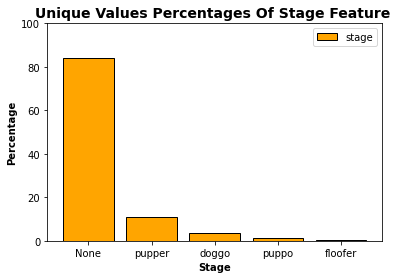

In [209]:
feature_uniques_percentage('stage')

Name: Sam ; Stage: None
Predicated Specie: Labrador_retriever
Prediction Confidence: 0.025823
Retweet Count: 1655 ; Favourite Count: 5927


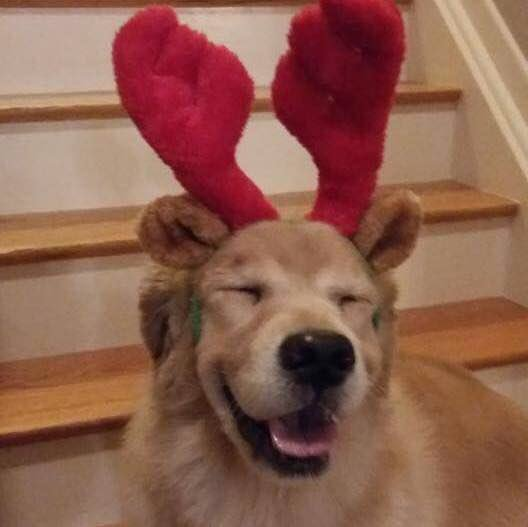

In [210]:
# Dog with highest rating
highest_rating = df.rating.max()
data = df.query('rating == @highest_rating')    
# get the image
Image(details_fun(data), width=300, height=300)

In [211]:
# Dog with highest retweet
highest = df.retweet_count.max()
data = df.query('retweet_count == @highest')  
# get details
details_fun(data)


Name: None ; Stage: doggo
Predicated Specie: whippet
Prediction Confidence: 0.018442
Retweet Count: 79515 ; Favourite Count: 131075


'https://pbs.twimg.com/ext_tw_video_thumb/74423...'

### Retweet count and favourite count trend in years

In [212]:
data = df.groupby(df.date.dt.year)["retweet_count","favourite_count"].sum()
data

C:\Users\dell\AppData\Local\Temp\ipykernel_5524\2911543380.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(df.date.dt.year)["retweet_count","favourite_count"].sum()


retweet_count  favourite_count
date                                
2015         200023           499924
2016        1053590          2909894
2017         761056          3106754

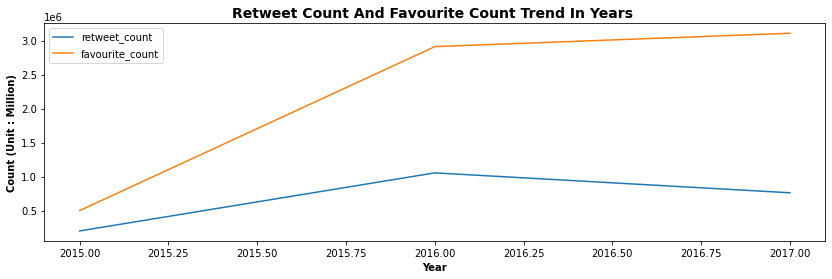

In [213]:
# plot the graph
data.plot(rot=0,figsize=(14,4));
# Add title and format it
plt.title('retweet count and favourite count trend in years '.title(),
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel('Year'.title(),fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Count (unit : million)".title(),
               fontsize = 10, weight = "bold");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retweet_count', ylabel='favourite_count'>

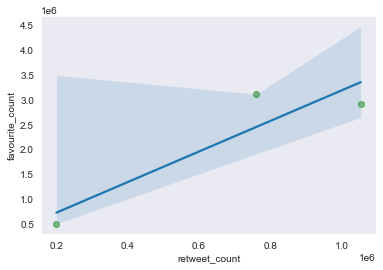

In [214]:
sns.set_style('dark')
sns.regplot(data.retweet_count, data.favourite_count, scatter_kws = {'color': 'Green', 'alpha': 0.5})

The plot above shows that there is a linear relationship between retweet_count and favorite_count. This data used for the analysis and visualization above is the final merged data which i saved as twitter_archive_master.csv.